In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from google.colab import files

# uploaded = files.upload()
data2 = pd.read_csv("merged_data.csv")
# Any results you write to the current directory are saved as output.
data2.head(10)
np.random.seed(seed=42)


In [0]:
meaning = {
    "10": "Расстояние до адм. центра",
    "17": "Расстояние до остановок транспорта",
    "2": "Материал стен 1 группа",
    "20": "Расстояние до областной столицы",
    "21": "Расстояние до центра района",
    "3": "Материал стен КС",
    "33": "Год постройки",
    "36": "Состояние объекта(ветхое/аварийное)",
    "4": "Микрорайон г.Новочебоксарск",
    "43": "Численность населения на районе",
    "44": "Численность населения в пункте",
    "45": "Этажность 1 группа",
    "46": "1 уровень группировки",
    "47": "2 уровень группировки",
    "48": "3 уровень группировки",
    "49": "4 уровень группировки",
    "5": "Микрорайон г.Чебоксары",
    "50": "5 уровень группировки",
    "56": "Код КЛАДР улицы",
    "57": "СНП Центр сельского поселения",
    "58": "Площадь 2 группа",
    "59": "Материал стен 2 группа",
    "60": "Код подгруппы",
    "61": "Подгруппа 2 группа",
    "7": "Площадь 1 группа",
    "8": "Подгруппа 1 группа"
}

# for column in data2.drop(["CadastralNumber", "Cost m2 unit", "Cost", "Cost unit", "Cost m2"], axis=1).columns:
#     print(f'"{column}": "{meaning[column]}"')    

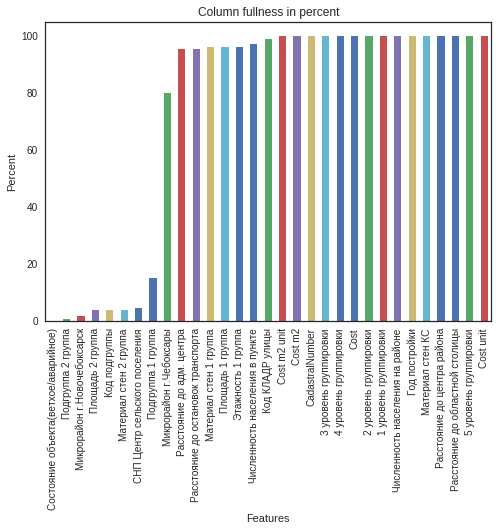

In [31]:
data = data2.rename(index=str, columns=meaning)
plt.xlabel("Features")
plt.ylabel("Percent")
pd.Series(100 - data.isnull().sum()/data.shape[0]*100).sort_values().plot("bar", title="Сolumn fullness in percent")

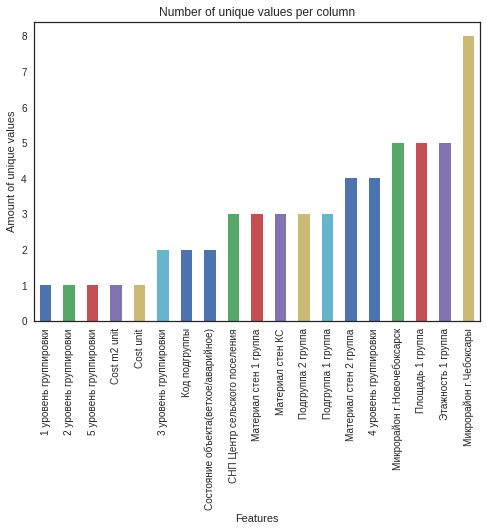

In [32]:
to_plot = {column:len(data[column].unique()) for column in data.columns if len(data[column].unique()) < 15}
plt.xlabel("Features")
plt.ylabel("Amount of unique values")
pd.Series(to_plot).sort_values().plot("bar", title="Number of unique values per column")

In [33]:
to_drop = ["Cost m2 unit", "Cost", "Cost unit", meaning["43"], meaning["44"], meaning["20"], meaning["21"], meaning["48"], meaning["49"],  "CadastralNumber"]
print("Before -",data.shape)
for column in data.columns:
    if data[column].isnull().sum() > data.shape[0] * 0.3 or len(data[column].unique()) == 1:
        to_drop.append(column)
data = data.drop(to_drop, axis=1).dropna()
print("After -",data.shape)

Before - (24540, 31)
After - (19594, 10)


In [0]:
data[meaning["5"]] = data[meaning["5"]].astype(int)

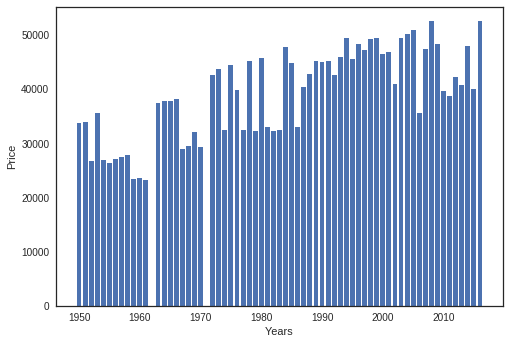

In [119]:
plt.bar(data[meaning["33"]], data["Cost m2"])
plt.xlabel("Years")
plt.ylabel("Price")
plt.show()

In [10]:
! pip install folium
! pip install geopandas

    100% |████████████████████████████████| 81kB 4.0MB/s 
    100% |████████████████████████████████| 901kB 4.7MB/s 
    100% |████████████████████████████████| 1.5MB 10.8MB/s 
    100% |████████████████████████████████| 15.8MB 2.2MB/s 
    100% |████████████████████████████████| 4.4MB 7.2MB/s 
    100% |████████████████████████████████| 81kB 18.3MB/s 
  Running setup.py bdist_wheel for pyproj ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done
  Stored in directory: /root/.cache/pip/wheels/89/77/ec/a537585d1022dafde0317dd19d33c4a30d4ee61e19f25ebd8e
  Running setup.py bdist_wheel for munch ... - done
  Stored in d

In [0]:
import geopandas as gpd
import folium
from google.colab import files
id_name = {
    30: "Новоюжный", 
    31: "Cеверо-западный", 
    32: "Южный, альгешево", 
    33: "Юго-западный", 
    34: "Центр города", 
    35: "Богданка",
    36: "Новый город",
    37: "Агрегатка и ХБК"}

new_map = folium.Map(location=[56.136543, 47.241840], zoom_start=12)
# folium.TileLayer('cartodbdark_matter').add_to(new_map)

# uploaded = files.upload()
df = gpd.read_file("map.json")
df["ids"] = ["33", "32", "30", "31", "36", "35", "34", "37"]

col = []
for i in df["ids"]:
    frame = data[data[meaning["5"]] == int(i)]
    col.append(frame["Cost m2"].mean())
df["mean_cost"] = col

new_map.choropleth(
    geo_data=df[["ids", 'geometry']].to_json(),
    name='choropleth',
    data=df[["ids", "mean_cost"]],
#     fill_color='RdPu',
    fill_color="YlGnBu",
    line_weight=1,
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight = True,
    columns=['ids', 'mean_cost'],
    key_on="feature.properties.ids",
    legend_name="Mean cadastral cost"
)


In [37]:
new_map = folium.Map(location=[56.136543, 47.241840], zoom_start=12)
# folium.TileLayer('cartodbdark_matter').add_to(new_map)
# uploaded = files.upload()
df = gpd.read_file("map.json")
df["ids"] = ["33", "32", "30", "31", "36", "35", "34", "37"]

col = []
for i in df["ids"]:
    frame = data[data[meaning["5"]] == int(i)]
    col.append(frame[meaning["33"]].mean())
df["mean_age"] = col

new_map.choropleth(
    geo_data=df[["ids", 'geometry']].to_json(),
    name='choropleth',
    data=df[["ids", "mean_age"]],
    fill_color='PuBu',
#     fill_color="RdBu",
    line_weight=1,
    fill_opacity=0.7,
    line_opacity=0.2,
    highlight = True,
    columns=['ids', 'mean_age'],
    key_on="feature.properties.ids",
    legend_name="Mean age"
)
new_map

In [14]:
data.head(4)

,Расстояние до адм. центра,Расстояние до остановок транспорта,Материал стен 1 группа,Материал стен КС,Год постройки,Этажность 1 группа,Микрорайон г.Чебоксары,Код КЛАДР улицы,Площадь 1 группа,Cost m2
0,3137.450,57.331,1.0,3,1982,102.0,30,11160.0,38.0,32280.39
1,1277.343,102.840,2.0,5,1973,104.0,31,14624.0,38.0,42853.69
2,1315.543,120.413,2.0,5,2005,102.0,31,11155.0,41.0,43745.45
3,3054.712,108.931,2.0,5,1998,102.0,33,10933.0,41.0,30787.71


In [38]:
import math
def transformation(value, transform='square'): 
    if transform == 'log':
        return 0 if math.log1p(value) == None else max(0, min(10 ** 3, math.log1p(value))) 
    elif transform == 'sqrt':
        return math.sqrt(value + 3.0 / 8) 
    elif transform == 'square':
        return value ** 2 
    elif transform == 'sin':
        return math.sin(value)
    elif transform == 'cos': 
        return math.cos(value)
data["sum1"] = data[meaning["17"]] + data[meaning["7"]]
data["mul1"] = data[meaning["3"]] * data[meaning["2"]]
data["mul2"] = data[meaning["7"]] * data[meaning["5"]]
columns = data.drop(["Cost m2"], axis=1).columns
possible_transformations = ["log", "sqrt", "square", "sin", "cos"]
for column in columns:
    for transform in possible_transformations:
        data[f"{column}_{transform}"] = data[column].apply(transformation,  args=(transform,))
print(data.columns)

Index(['Расстояние до адм. центра', 'Расстояние до остановок транспорта',
       'Материал стен 1 группа', 'Материал стен КС', 'Год постройки',
       'Этажность 1 группа', 'Микрорайон г.Чебоксары', 'Код КЛАДР улицы',
       'Площадь 1 группа', 'Cost m2', 'sum1', 'mul1', 'mul2',
       'Расстояние до адм. центра_log', 'Расстояние до адм. центра_sqrt',
       'Расстояние до адм. центра_square', 'Расстояние до адм. центра_sin',
       'Расстояние до адм. центра_cos',
       'Расстояние до остановок транспорта_log',
       'Расстояние до остановок транспорта_sqrt',
       'Расстояние до остановок транспорта_square',
       'Расстояние до остановок транспорта_sin',
       'Расстояние до остановок транспорта_cos', 'Материал стен 1 группа_log',
       'Материал стен 1 группа_sqrt', 'Материал стен 1 группа_square',
       'Материал стен 1 группа_sin', 'Материал стен 1 группа_cos',
       'Материал стен КС_log', 'Материал стен КС_sqrt',
       'Материал стен КС_square', 'Материал стен КС_sin',

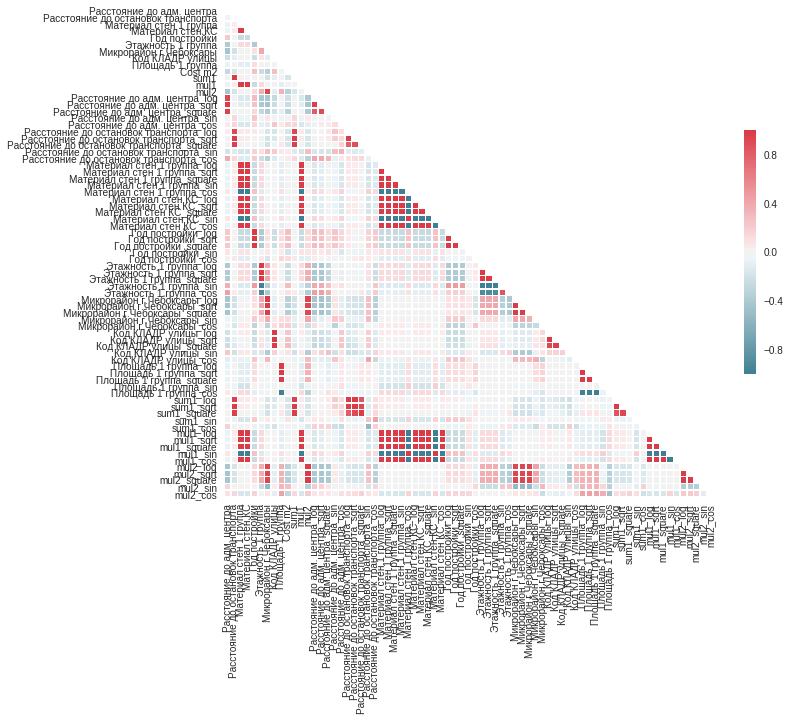

In [16]:
import seaborn as sns
from string import ascii_letters
sns.set(style="white")

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [0]:
def remove_collinear_features(x, threshold):
    y = x['Cost m2']
    x = x.drop(['Cost m2'], axis=1)
    # Считаем матрицу кореляций
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Сравниваем фичу каждую с каждой
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # Если кореляция больше, чем трешхолд
            if val >= threshold:
                drop_cols.append(col.values[0])

    # Удаляем по одному из каждой пары корелируемых
    drops = set(drop_cols)
    x = x.drop(drops, axis=1)
    
    # Возвращаем таргет в таблицу
    x['Cost m2'] = y
    return x

data = remove_collinear_features(data, 0.5)

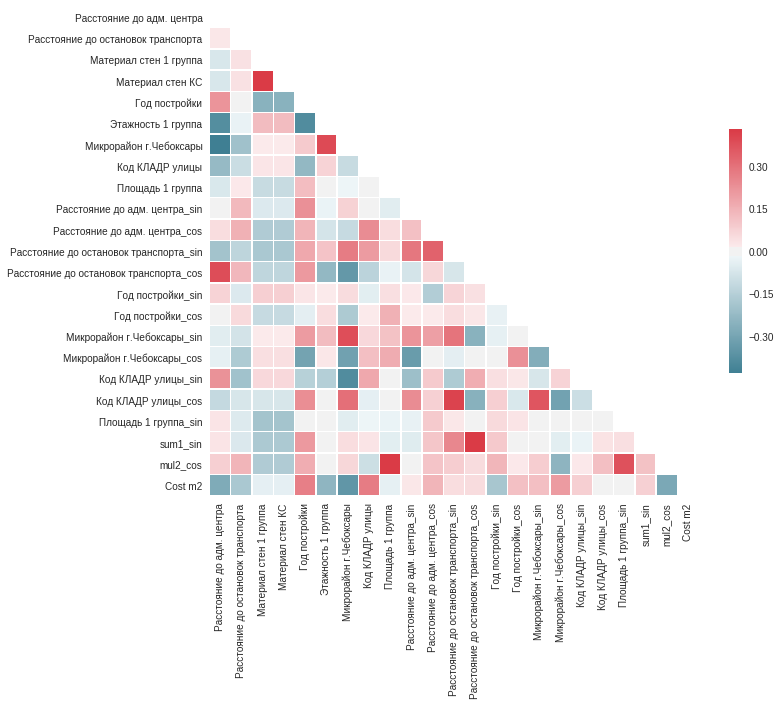

In [18]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [19]:
# Onehot encoding
from sklearn.preprocessing import OneHotEncoder
encode_columns = [column for column in list(data.columns.values) if len(data[column].unique()) < 6]
data = data.reset_index()
enc = OneHotEncoder()
for column in encode_columns:
    # print(column, data[column].isnull().sum())
    X = enc.fit_transform(data[column].values.reshape(-1, 1)).toarray()
    OneHot = pd.DataFrame(X, columns = [f"{column}_{i}" for i in range(X.shape[1])])
    data = pd.concat([data, OneHot], axis=1)
    
print('One-hot encoded:', encode_columns)
data = data.drop(encode_columns, axis=1)

One-hot encoded: ['Материал стен 1 группа', 'Материал стен КС', 'Этажность 1 группа', 'Площадь 1 группа', 'Площадь 1 группа_sin']


In [20]:
data.head(10)

,index,Расстояние до адм. центра,Расстояние до остановок транспорта,Год постройки,Микрорайон г.Чебоксары,Код КЛАДР улицы,Расстояние до адм. центра_sin,Расстояние до адм. центра_cos,Расстояние до остановок транспорта_sin,Расстояние до остановок транспорта_cos,...,Материал стен КС_1,Этажность 1 группа_0,Этажность 1 группа_1,Этажность 1 группа_2,Этажность 1 группа_3,Площадь 1 группа_0,Площадь 1 группа_1,Площадь 1 группа_2,Площадь 1 группа_3,Площадь 1 группа_sin_0
0,0,3137.450,57.331,1982,30,11160.0,0.842044,-0.539409,0.704936,0.709271,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,1277.343,102.840,1973,31,14624.0,0.959497,-0.281720,0.739655,-0.672986,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,2,1315.543,120.413,2005,31,11155.0,0.706345,-0.707867,0.858573,0.512692,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3,3054.712,108.931,1998,33,10933.0,0.883808,0.467849,0.854581,-0.519319,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,4,3441.044,86.619,1981,30,11111.0,-0.841495,-0.540265,-0.974749,0.223303,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,5,1315.543,120.413,2004,31,11155.0,0.706345,-0.707867,0.858573,0.512692,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6,6,1053.305,605.268,2012,34,10924.0,-0.765270,-0.643709,0.872053,-0.489411,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,7,2706.018,42.503,1984,31,11124.0,-0.894238,-0.447592,-0.995817,0.091372,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8,8,2619.958,25.883,1984,31,14624.0,-0.129905,0.991526,0.681828,0.731512,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9,9,450.972,147.435,1970,37,10965.0,-0.988249,0.152853,0.218088,-0.975929,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [0]:
from sklearn.model_selection import train_test_split

Y = data["Cost m2"]
X = data.drop(["Cost m2"], axis=1)
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y, test_size=0.1, random_state=42)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=42)

In [22]:
! pip install catboost
! pip install ipywidgets

    100% |████████████████████████████████| 59.0MB 603kB/s 
    100% |████████████████████████████████| 112kB 4.0MB/s 
    100% |████████████████████████████████| 2.2MB 7.3MB/s 


In [23]:
import catboost as cb

cb_model = cb.CatBoostRegressor(
#     task_type="GPU"
)
cb_model.fit(
    X_train, Y_train,
    use_best_model=True,
    eval_set=cb.Pool(X_val, Y_val),
    logging_level="Verbose",  # 'Silent', 'Verbose', 'Info', 'Debug'
    early_stopping_rounds=1,
    plot=True
)
cb_model.save_model("trained_model", format="cbm")


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 33591.2591144	test: 33765.1286964	best: 33765.1286964 (0)	total: 112ms	remaining: 1m 51s
1:	learn: 32608.1484846	test: 32781.0270658	best: 32781.0270658 (1)	total: 159ms	remaining: 1m 19s
2:	learn: 31644.3508886	test: 31815.9870013	best: 31815.9870013 (2)	total: 184ms	remaining: 1m 1s
3:	learn: 30715.8366909	test: 30884.6600083	best: 30884.6600083 (3)	total: 209ms	remaining: 52.1s
4:	learn: 29811.5458815	test: 29982.2247294	best: 29982.2247294 (4)	total: 235ms	remaining: 46.7s
5:	learn: 28933.7918127	test: 29105.0033988	best: 29105.0033988 (5)	total: 296ms	remaining: 49.1s
6:	learn: 28087.1845877	test: 28257.7803753	best: 28257.7803753 (6)	total: 345ms	remaining: 49s
7:	learn: 27263.2151445	test: 27428.8331243	best: 27428.8331243 (7)	total: 370ms	remaining: 45.9s
8:	learn: 26464.3591616	test: 26628.8501718	best: 26628.8501718 (8)	total: 397ms	remaining: 43.7s
9:	learn: 25691.0079510	test: 25851.5596294	best: 25851.5596294 (9)	total: 422ms	remaining: 41.8s
10:	learn: 24935.398

In [24]:
cb_model.score(X_test, Y_test)

436.09476891852455

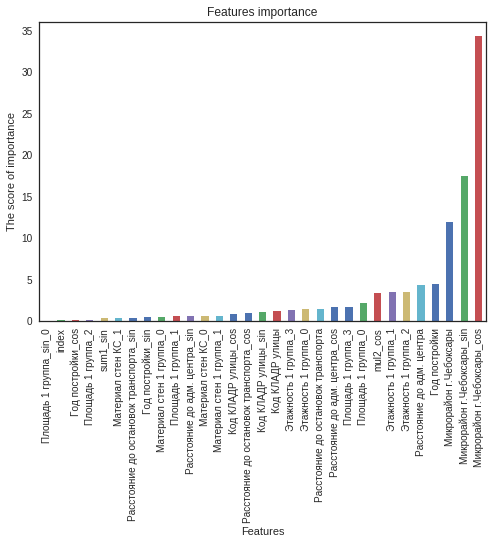

In [25]:
plt.xlabel("Features")
plt.ylabel("The score of importance")
pd.Series(cb_model.feature_importances_, index=X_train.columns).sort_values().plot("bar", title="Features importance")

In [0]:
pred_test = pd.DataFrame({"prediction": np.round(cb_model.predict(X_test), 2), "test": Y_test}).head(1000)

In [27]:
from sklearn.metrics import r2_score
r2_score(pred_test["test"], pred_test["prediction"])

0.9955982505887888

Text(1,9,'$R^2$=1.00, MAE=249.03')

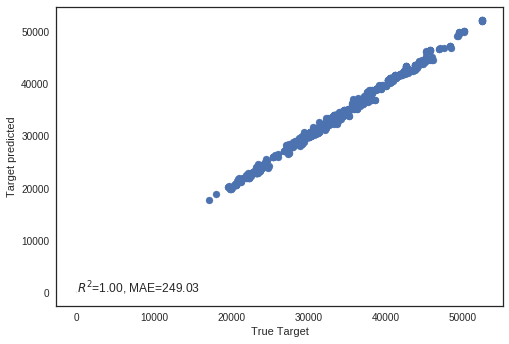

In [47]:
from sklearn.metrics import median_absolute_error
plt.scatter(pred_test["test"], pred_test["prediction"])
plt.plot([0, 10], [0, 10], '--k')
plt.ylabel('Target predicted')
plt.xlabel('True Target')
plt.text(1, 9, r'$R^2$=%.2f, MAE=%.2f' % (
    r2_score(pred_test["test"], pred_test["prediction"]), median_absolute_error(pred_test["test"], pred_test["prediction"])))